# 补充标准代码


## 宏、微查全查准

例题(仅借用背景)

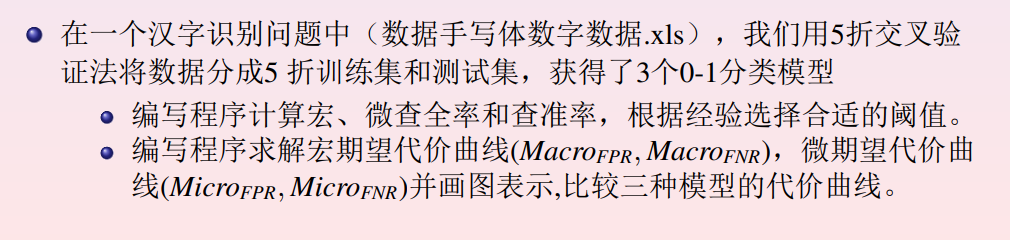

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
#标签分类
def modelsort(predict):
    list0=[]
    for i in range(len(predict)):
        if predict[i]>0.5:
            list0.append(1)
        else:
            list0.append(0)
    return list0

#读入数据
data=pd.read_excel('手写体数据.xlsx')
#观察数据集，将其k折分类表明
kfold=[data.iloc[0:96,:],data.iloc[96:192,:],data.iloc[192:288,:],data.iloc[288:384,:],data.iloc[384:480,:]]
listp1=[];listp2=[];listp3=[]
listr1=[];listr2=[];listr3=[]
#计算k折下的宏查全率查准率
for i in range(5):
    confmat1=confusion_matrix(y_true=kfold[i].loc[:,['数据标签']].values,y_pred=modelsort(kfold[i].loc[:,['模型1预测']].values))
    confmat2=confusion_matrix(y_true=kfold[i].loc[:,['数据标签']].values,y_pred=modelsort(kfold[i].loc[:,['模型2预测']].values))
    confmat3=confusion_matrix(y_true=kfold[i].loc[:,['数据标签']].values,y_pred=modelsort(kfold[i].loc[:,['模型3预测']].values))
    listp1.append(confmat1[1][1]/(confmat1[1][1]+confmat1[0][1]))
    listr1.append(confmat1[1][1]/(confmat1[1][1]+confmat1[1][0]))
    listp2.append(confmat2[1][1]/(confmat2[1][1]+confmat2[0][1]))
    listr2.append(confmat2[1][1]/(confmat2[1][1]+confmat2[1][0]))  
    listp3.append(confmat3[1][1]/(confmat3[1][1]+confmat3[0][1]))
    listr3.append(confmat3[1][1]/(confmat3[1][1]+confmat3[1][0]))  
print('模型1的宏查准率为%f'%(np.mean(listp1)))
print('模型1的宏查全率为%f'%(np.mean(listr1)))
print('模型2的宏查准率为%f'%(np.mean(listp2)))
print('模型2的宏查全率为%f'%(np.mean(listr2)))
print('模型3的宏查准率为%f'%(np.mean(listp3)))
print('模型3的宏查全率为%f'%(np.mean(listr3)))

#计算k折下的微查全率查准率
confmat1=np.array([[0,0],[0,0]])
confmat2=np.array([[0,0],[0,0]])
confmat3=np.array([[0,0],[0,0]])
for i in range(5):
    confmat1=confmat1+confusion_matrix(y_true=kfold[i].loc[:,['数据标签']].values,y_pred=modelsort(kfold[i].loc[:,['模型1预测']].values))
    confmat2=confmat2+confusion_matrix(y_true=kfold[i].loc[:,['数据标签']].values,y_pred=modelsort(kfold[i].loc[:,['模型2预测']].values))
    confmat3=confmat3+confusion_matrix(y_true=kfold[i].loc[:,['数据标签']].values,y_pred=modelsort(kfold[i].loc[:,['模型3预测']].values))
confmat1=confmat1/5
confmat2=confmat2/5
confmat3=confmat3/5
print()
print('模型1的微查准率为%f'%(confmat1[1][1]/(confmat1[1][1]+confmat1[0][1])))
print('模型1的微查全率为%f'%(confmat1[1][1]/(confmat1[1][1]+confmat1[1][0])))
print('模型2的微查准率为%f'%(confmat2[1][1]/(confmat2[1][1]+confmat2[0][1])))
print('模型2的微查全率为%f'%(confmat2[1][1]/(confmat2[1][1]+confmat2[1][0])))
print('模型3的微查准率为%f'%(confmat3[1][1]/(confmat3[1][1]+confmat3[0][1])))
print('模型3的微查全率为%f'%(confmat3[1][1]/(confmat3[1][1]+confmat3[1][0])))


模型1的宏查准率为0.829403
模型1的宏查全率为0.858333
模型2的宏查准率为0.530520
模型2的宏查全率为0.504167
模型3的宏查准率为0.534917
模型3的宏查全率为0.545833

模型1的微查准率为0.827309
模型1的微查全率为0.858333
模型2的微查准率为0.530702
模型2的微查全率为0.504167
模型3的微查准率为0.532520
模型3的微查全率为0.545833


## 决策树

In [ ]:
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1 + float(numLeafs)) / 2.0 / plotTree.totalW,
              plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff),
                     cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD

In [ ]:

def splitDataSetWithNull(dataSet, axis, value, LorR='N'):
    """
    type: (list, int, string or float, string) -> list
    划分数据集
    axis:按第几个特征划分
    value:划分特征的值
    LorR: N 离散属性; L 小于等于value值; R 大于value值
    """
    retDataSet = []
    nullDataSet = []
    featVec = []
    totalWeightV = calcTotalWeight(dataSet, axis, False)  # 非空样本权重
    totalWeightSub = 0.0
    if LorR == 'N':  # 离散属性
        for featVec in dataSet:
            if featVec[axis] == value:
                reducedFeatVec = featVec[:axis]
                reducedFeatVec.extend(featVec[axis + 1:])
                retDataSet.append(reducedFeatVec)
            elif featVec[axis] == 'N':
                reducedNullVec = featVec[:axis]
                reducedNullVec.extend(featVec[axis + 1:])
                nullDataSet.append(reducedNullVec)
    elif LorR == 'L':
        for featVec in dataSet:
            if featVec[axis] != 'N':
                if float(featVec[axis]) < value:
                    retDataSet.append(featVec)
            elif featVec[axis] == 'N':
                nullDataSet.append(featVec)
    elif LorR == 'R':
        for featVec in dataSet:
            if featVec[axis] != 'N':
                if float(featVec[axis]) > value:
                    retDataSet.append(featVec)
            elif featVec[axis] == 'N':
                nullDataSet.append(featVec)

    totalWeightSub = calcTotalWeight(retDataSet, -1, True)  # 计算此分支中非空样本的总权重
    for nullVec in nullDataSet:  # 把缺失值样本按权值比例划分到分支中
        nullVec[-2] = float(nullVec[-2]) * totalWeightSub / totalWeightV
        retDataSet.append(nullVec)

    return retDataSet


In [ ]:

# 创建树, 样本集 特征 特征属性（0 离散， 1 连续）
def createTree(dataSet, labels, labelProperty,minaddEnt = 0):
    """
    :param dataSet: 样本集
    :param labels: 样本特征标签
    :param labelProperty: 特征值类型，1 连续， 0 离散
    :param minaddEnt: 预剪枝设定增益阈值
    :return: 字典形式储存的决策树结点
    """
    classList = [example[-1] for example in dataSet]  # 类别向量
    weightList = [example[-2] for example in dataSet]  # 权重向量
    if classList.count(classList[0]) == len(classList):  # 如果只有一个类别，返回
        totalWeiht = calcTotalWeight(dataSet,0,True)
        return (classList[0], round(totalWeiht,1),0.0)
    #totalWeight = calcTotalWeight(dataSet, 0, True)
    if len(dataSet[0]) == 1:  # 如果所有特征都被遍历完了，返回出现次数最多的类别
        return majorityCnt(classList)
    bestFeat, bestPartValue = chooseBestFeatureToSplit(dataSet,
                                                       labelProperty,minaddEnt)  # 最优分类特征的索引
    if bestFeat == -1:  # 如果无法选出最优分类特征，返回出现次数最多的类别
        return majorityCnt(classList, weightList)
    if labelProperty[bestFeat] == 0:  # 对离散的特征
        bestFeatLabel = labels[bestFeat]
        myTree = {bestFeatLabel: {}}
        labelsNew = copy.copy(labels)
        labelPropertyNew = copy.copy(labelProperty)
        del (labelsNew[bestFeat])  # 已经选择的特征不再参与分类
        del (labelPropertyNew[bestFeat])
        featValues = [example[bestFeat] for example in dataSet]
        uniqueValue = set(featValues)  # 该特征包含的所有值
        uniqueValue.discard('N')
        for value in uniqueValue:  # 对每个特征值，递归构建树
            subLabels = labelsNew[:]
            subLabelProperty = labelPropertyNew[:]
            myTree[bestFeatLabel][value] = createTree(
                splitDataSetWithNull(dataSet, bestFeat, value), subLabels,
                subLabelProperty,minaddEnt)
    else:  # 对连续的特征，不删除该特征，分别构建左子树和右子树
        bestFeatLabel = labels[bestFeat] + '<' + str(bestPartValue)
        myTree = {bestFeatLabel: {}}
        subLabels = labels[:]
        subLabelProperty = labelProperty[:]
        # 构建左子树
        valueLeft = 'Y'
        myTree[bestFeatLabel][valueLeft] = createTree(
            splitDataSetWithNull(dataSet, bestFeat, bestPartValue, 'L'), subLabels,
            subLabelProperty,minaddEnt)
        # 构建右子树
        valueRight = 'N'
        myTree[bestFeatLabel][valueRight] = createTree(
            splitDataSetWithNull(dataSet, bestFeat, bestPartValue, 'R'), subLabels,
            subLabelProperty,minaddEnt)
    return myTree

